Saving 0A8D8232-AA7B-4DDC-8AD0-766F0AFBBF0C.jpeg to 0A8D8232-AA7B-4DDC-8AD0-766F0AFBBF0C.jpeg
生成呪文: face,master piece,best quality,CG,wall paper,HDR,high quality,high definition,extremely detailed,,age of 32 man,3d,asian,black_hair,black_jacket,blazer,blur_censor,blurry,blurry_background,blurry_foreground,collared_shirt,depth_of_field,formal,jacket,lips,long_sleeves,looking_at_viewer,motion_blur,necktie,photo_\(medium\),photorealistic,realistic,shirt,solo,suit,white_shirt,wing_collar


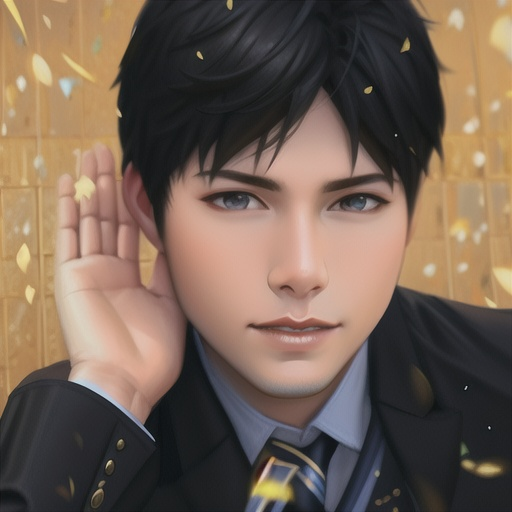

In [11]:
from google.colab import files
from IPython.display import Image
import requests
import base64
import json

uploaded = files.upload()

filename = list(uploaded.keys())[0]

with open("{}".format(filename), "rb") as f:
    image = f.read()
    image_64_encode = base64.b64encode(image).decode('utf-8')

ss = json.dumps(
{
    "parameter": {
        "rsp_media_type": "jpg",
    },
    "extra": {},
    "media_info_list": [{
        "media_data": image_64_encode,
        "media_profiles": {
            "media_data_type":"jpg"
        },
        "media_extra": {
        }
    }]

}
)

AIBeauty_url = "https://openapi.mtlab.meitu.com/v1/stable_diffusion_anime?api_key=237d6363213c4751ba1775aba648517d&api_secret=b7b1c5865a83461ea5865da3ecc7c03d"
response = requests.post(AIBeauty_url, data=ss)

afterfilename = "{}_ai.{}".format(*filename.split(".")[:-1],
                                    *filename.split(".")[-1:])

with open(afterfilename, "wb") as f:
    f.write(base64.b64decode(response.json()["media_info_list"][0]["media_data"]))
    
prompt = response.json()["media_info_list"][0]["media_extra"]["prompt"]
print("生成呪文: {}".format(prompt))


Image(afterfilename)

